# Data analysis: Survivors of sinking of the Titanic

Data analysis of survivors of sinking of the Titanic, using data from:

<https://hbiostat.org/data/>

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use("ggplot")

In [3]:
pd.options.display.precision = 2

## Read data

In [4]:
df = pd.read_csv("titanic.txt")
df.head(5)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.00,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.00,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.00,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.00,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.92,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


## Analysis

In [5]:
def survivors(df):
    return len(df[df == 1])

def survivors_pct(df):
    return len(df[df == 1]) / len(df)

### Survivors by age

In [6]:
df["age_bucket"] = np.floor(df["age"] / 10.0)
df.head(3)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex,age_bucket
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0,Southampton,"St Louis, MO",B-5,24160 L221,2,female,2.0
1,2,1st,0,"Allison, Miss Helen Loraine",2.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0.0
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male,3.0


In [7]:
survivors_by_age = df.groupby("age_bucket")["survived"].agg(
    survivors_pct=survivors_pct,
    survivors=survivors,
    total=len
)
survivors_by_age

,survivors_pct,survivors,total
age_bucket,,,
0.0,0.72,33,46
1.0,0.50,41,82
2.0,0.36,67,186
3.0,0.45,65,145
4.0,0.43,41,95
5.0,0.49,26,53
6.0,0.36,8,22
7.0,0.00,0,4


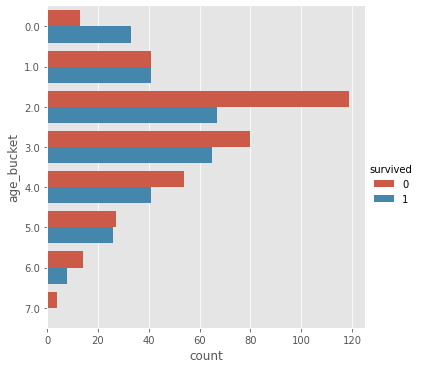

In [8]:
sns.catplot(data=df, y="age_bucket", hue="survived", kind="count")

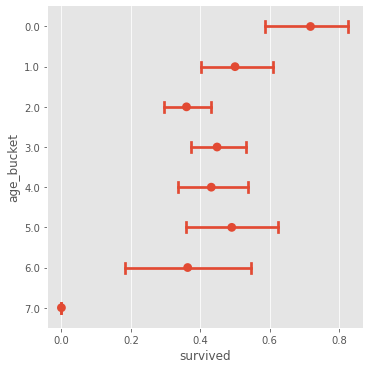

In [9]:
sns.catplot(data=df, y="age_bucket", x="survived", kind="point", join=False, orient="h", capsize=0.25)

### Survivors by passenger class

In [10]:
survivors_by_class = df.groupby("pclass")["survived"].agg(
    survivors_pct=survivors_pct,
    survivors=survivors, 
    total=len
)
survivors_by_class

,survivors_pct,survivors,total
pclass,,,
1st,0.60,193,322
2nd,0.42,119,280
3rd,0.19,137,711


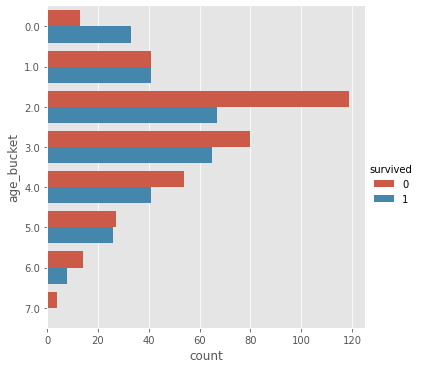

In [11]:
sns.catplot(data=df, y="age_bucket", hue="survived", kind="count")

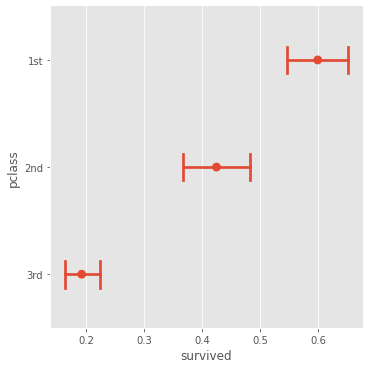

In [12]:
sns.catplot(data=df, y="pclass", x="survived", kind="point", join=False, orient="h", capsize=0.25)

### Survivors by passenger class and age

In [13]:
survivors_by_class_and_age = df.groupby(["pclass", "age_bucket"])["survived"].agg(
    survivors_pct=survivors_pct,
    survivors=survivors, 
    total=len
)
survivors_by_class_and_age.unstack(level=0)

survivors_pct             survivors             total            
pclass               1st   2nd   3rd       1st   2nd   3rd   1st   2nd   3rd
age_bucket                                                                  
0.0                 0.75  1.00  0.45       3.0  20.0  10.0   4.0  20.0  22.0
1.0                 0.89  0.52  0.32      16.0  12.0  13.0  18.0  23.0  41.0
2.0                 0.73  0.36  0.14      30.0  27.0  10.0  41.0  74.0  71.0
3.0                 0.62  0.41  0.28      31.0  23.0  11.0  50.0  56.0  39.0
4.0                 0.57  0.42  0.10      29.0  10.0   2.0  51.0  24.0  20.0
5.0                 0.56  0.31  0.00      22.0   4.0   0.0  39.0  13.0   1.0
6.0                 0.40  0.00  0.00       8.0   0.0   0.0  20.0   1.0   1.0
7.0                 0.00  0.00   NaN       0.0   0.0   NaN   3.0   1.0   NaN

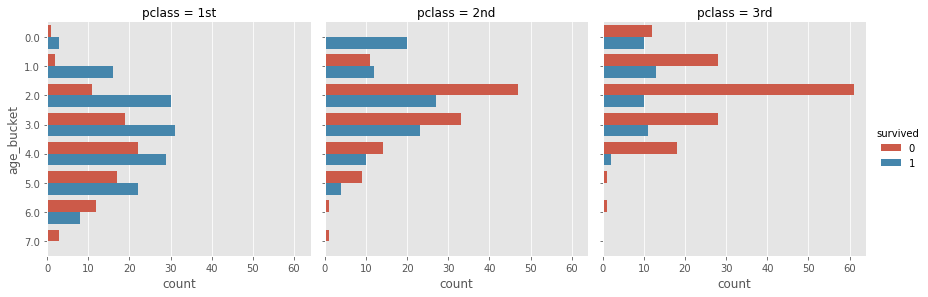

In [14]:
sns.catplot(data=df, y="age_bucket", hue="survived", col="pclass", kind="count", height=4)

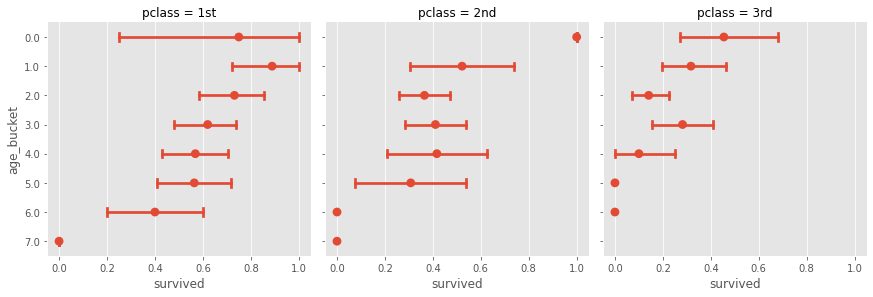

In [15]:
sns.catplot(data=df, y="age_bucket", x="survived", col="pclass", kind="point", join=False, orient="h", capsize=0.25, height=4)